<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/Band%C4%B1rma_AirQualityIndex_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VERİ SETİ**

Bandırma Air Quality Dataset (2021–2024)
Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Zaman Boyutu: year, month, day, hour sütunlarıyla belirtilmiş (Henüz datetime tipine çevrilmemiş)

Kirletici Değişkenler (µg/m³):

pm10: Partikül Madde (10 mikron)

so2: Kükürt Dioksit

no2: Azot Dioksit

o3 : Ozon (Troposferik)

Meteorolojik Değişkenler:

temp : Sıcaklık

dwpt : Çiy Noktası

rhum : Bağıl Nem

prcp : Yağış

wdir : Rüzgar Yönü

wspd : Rüzgar Hızı

pres : Basınç


Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


Bandırma Air Quality Dataset (2021–2024)

Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Sütunlar

datetime: Ölçüm zaman

**pm10** (Partikül Madde 10 mikron), **so2** (Kükürt Dioksit), **no2** (Azot Dioksit), **o3** (Ozon – Troposferik): Kirletici konsantrasyonları (µg/m³)

temp (sıcaklık), dwpt (çiy noktası), rhum (bağıl nem), prcp (yağış), wdir (rüzgar yönü), wspd (rüzgar hızı), pres (basınç): Meteoroloji verileri

Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


In [ ]:
!pip install meteostat

# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2025, 1, 1, 1, 0)

# Get hourly data
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)

                     temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                            
2021-01-01 00:00:00  11.9   9.5   85.0   NaN   NaN  180.0  18.4   NaN  1014.5   
2021-01-01 01:00:00  11.0   9.1   88.0   NaN   NaN  260.0  14.8   NaN  1014.0   
2021-01-01 02:00:00  11.0  10.1   94.0   NaN   NaN  150.0   7.6   NaN  1014.0   
2021-01-01 03:00:00  10.1   9.2   94.0   NaN   NaN  170.0   9.4   NaN  1014.6   
2021-01-01 04:00:00  11.0  10.1   94.0   NaN   NaN  220.0   7.6   NaN  1015.0   
...                   ...   ...    ...   ...   ...    ...   ...   ...     ...   
2024-12-31 21:00:00   2.1   1.7   97.0   0.0   NaN    0.0   0.0   NaN  1033.4   
2024-12-31 22:00:00   1.0   1.0  100.0   0.0   NaN  100.0   1.8   NaN  1032.0   
2024-12-31 23:00:00   1.0   1.0  100.0   0.0   NaN  260.0   1.8   NaN  1033.0   
2025-01-01 00:00:00   0.5   0.1   97.0   0.0   NaN  230.0   1.8   NaN  1033.4   
2025-01-01 01:00:00   1.0   

#Keşifsel Veri Analizi (Exploratory Data Analysis)

##Veri Yükleme ve İnceleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Bandirma_AQ.xlsx"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fkarabas/bandirma-aqi-2021-2024",
  file_path,)


<ipython-input-29-aa8a6be6020f>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [30]:
df_kopya = df.copy()

In [31]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85,0.0,180.0,18.4,1014.5
1,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88,NaN,260.0,14.8,1014.0
2,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94,NaN,150.0,7.6,1014.0
3,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94,NaN,170.0,9.4,1014.6
4,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94,NaN,220.0,7.6,1015.0


In [4]:
df.shape  # (satır sayısı, sütun sayısı)

(35064, 15)

In [5]:
df.sample(6)  # Rastgele belirlenen sayıda satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
10475,2022,3,13,11,25.47,14.31,24.86,49.97,5.0,-4.0,52,0.3,330.0,18.4,1029.0
14985,2022,9,17,9,NaN,NaN,NaN,NaN,32.0,10.7,27,0.0,260.0,13.0,1006.6
4915,2021,7,24,19,64.12,2.63,12.39,98.20,24.0,19.1,74,0.0,20.0,37.1,1012.0
15288,2022,9,30,0,53.16,8.66,67.24,14.70,15.3,10.9,75,0.0,0.0,0.0,1013.7
17220,2022,12,19,12,10.55,4.63,22.82,NaN,8.2,3.3,71,0.1,50.0,44.3,1034.3
11849,2022,5,9,17,37.47,4.08,29.83,61.40,14.0,9.0,72,0.0,40.0,25.9,1020.0


In [6]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    32366 non-null  float64
 5   so2     33940 non-null  float64
 6   no2     33945 non-null  float64
 7   o3      22884 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  int64  
 11  prcp    34778 non-null  float64
 12  wdir    35035 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    34902 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


10.satırda [rhum] sütun değerleriniveri tipi "int64" olarak gelmiş bunu "float64" olarak değiştiryorum.

In [32]:
df['rhum'] = df['rhum'].astype('float64')

In [ ]:
df.dtypes

,0
year,int64
month,int64
day,int64
hour,int64
pm10,float64
so2,float64
no2,float64
o3,float64
temp,float64
dwpt,float64


In [ ]:
df.nunique()

,0
year,4
month,12
day,31
hour,24
pm10,8934
so2,3184
no2,7854
o3,9691
temp,404
dwpt,345


In [38]:
# Tüm sütunların gösterilmesi ve ekran genişliğinin arttırılması
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # DataFrame'in çok satıra bölünmesini engeller
pd.set_option('display.width', None)           # Genişliği sınırlama

# Define the lists of pollutant and meteorological variables
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
selected_cols = kirleticiler + meteorolojik

df_selected = df[selected_cols]

print(df_selected.describe().T)

        count         mean         std     min          25%          50%          75%      max
pm10  35064.0    43.492582   24.741113    0.31    26.870000    38.220000    54.152070   320.89
so2   35064.0     8.268668    7.361157    0.00     3.880000     6.280000    10.450000   209.86
no2   35064.0    31.843160   20.236906    0.38    17.200000    27.495000    41.871461   178.03
o3    35064.0    51.929368   27.980636    0.00    30.748943    50.370934    71.390000   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.200000    15.000000    22.000000    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.200000    11.000000    16.000000    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.000000    78.000000    89.000000   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.000000     0.000000     0.000000    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.000000    51.000000   200.000000   360.00
wspd  35064.0    16.274809   11.481866    0.00    

| Değişken | Ortalama | Standart Sapma | Min–Maks    | Açıklama                                                                                                                                             |
| -------- | -------- | -------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **pm10** | 43.26    | 25.31          | 0.31–320.89 | Ortalama seviyede ancak bazı ekstrem (yüksek) değerler mevcut. Sağlık sınırlarını aşabilecek günler olabilir.                                        |
| **so2**  | 8.26     | 7.44           | 0.00–209.86 | Genellikle düşük ama bazı zirve değerler (örneğin 209) ciddi kaynaklı emisyonlara işaret edebilir.                                                   |
| **no2**  | 31.75    | 20.42          | 0.38–178.03 | Ortalama düzeyde azot dioksit var, trafiğin yoğun olduğu saatler/süreçler araştırılabilir.                                                           |
| **o3**   | 54.21    | 30.29          | 1.28–192.34 | Ozon değerleri yüksek değişkenlik göstermektedir, mevsimsel etkilerle ilişkili olabilir. Ayrıca eksik veri oranı yüksektir (12.000'den fazla eksik). |


| Değişken         | Ortalama | Standart Sapma | Min–Maks     | Açıklama                                                                             |
| ---------------- | -------- | -------------- | ------------ | ------------------------------------------------------------------------------------ |
| **temp (°C)**    | 15.52    | 8.12           | -8.3–43.0    | Doğal bir dağılım, mevsim geçişlerine uygun.                                         |
| **dwpt (°C)**    | 10.79    | 6.54           | -9.5–27.0    | Çiy noktası sıcaklığı beklenen aralıklarda.                                          |
| **prcp (mm)**    | 0.07     | 0.38           | 0.0–11.7     | Çok sayıda sıfır değer (yağışsız saat), yağışın az ve seyrek olduğu görülüyor.       |
| **wdir (°)**     | 118.63   | 115.66         | 0–360        | Rüzgar yönü tam dairesel kapsamda (360°) ölçülmüş. Ortalama batı–güneybatı arası.    |
| **wspd (km/s?)** | 16.27    | 11.48          | 0.0–74.2     | Rüzgar hızı çok değişken, bazı ekstrem değerler fırtınalı koşulları işaret edebilir. |
| **pres (hPa)**   | 1015.91  | 6.42           | 980.0–1038.2 | Basınç normal atmosfer aralığında, ölçüm güvenilir gözüküyor.                        |


📌 Genel Değerlendirme

Eksik veri sorunu özellikle pm10, o3, ve prcp değişkenlerinde dikkat çekmektedir.

Aykırı değerler pm10, so2, no2, ve wspd gibi değişkenlerde yüksek sapma ve maks. değerlerde görülmektedir → İleride aykırı değer analizi yapılmalı.

Mevsimsel desen analizi yapılması uygun görünüyor çünkü sıcaklık, rüzgar, basınç gibi meteorolojik değişkenlerde yıllık varyasyonlar belirgin olabilir.

Ozon (O₃) seviyelerinin özellikle yaz dönemlerinde ve sıcaklıkla birlikte nasıl değiştiği incelenmeli çünkü sağlık etkileri oldukça belirgindir.

##Eksik Veri Analizi ve Temizleme

### Zaman serisi analizi için veri seti hazırla.

In [44]:
# year, month, day ve hour sütunlarını birleştirerek datetime değişkeni oluştur
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# datetime değişkenini veri setinin en başına alalım
cols = ["datetime"] + [col for col in df.columns if col != "datetime"]
df = df[cols]

# datetime'e göre sıralayalım
df = df.sort_values("datetime").reset_index(drop=True)

# Yeni yapıyı göster
df.head()

,datetime,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021-01-01 00:00:00,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85.0,0.0,180.0,18.4,1014.5
1,2021-01-01 01:00:00,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88.0,NaN,260.0,14.8,1014.0
2,2021-01-01 02:00:00,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94.0,NaN,150.0,7.6,1014.0
3,2021-01-01 03:00:00,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94.0,NaN,170.0,9.4,1014.6
4,2021-01-01 04:00:00,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94.0,NaN,220.0,7.6,1015.0


In [33]:
# Eksik veri sayısı ve oranı
eksik = df.isnull().sum()
oran = 100 * df.isnull().mean()

# Sadece eksik değeri olanları yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran.map(lambda x: f'{x:.3f}')})[eksik > 0])

      Eksik veri Sayısı Oran (%)
pm10               2698    7.695
so2                1124    3.206
no2                1119    3.191
o3                12180   34.736
prcp                286    0.816
wdir                 29    0.083
pres                162    0.462


 Sonuçlara göre özellikle O₃ (ozon) değişkeninde ciddi eksiklik (%34,7), diğer değişkenlerde ise %1–8 arasında eksiklikler mevcut.

EKSİK VERİLERİN ZAMAN DESENİ

 Saatlik Eksik Veri Deseni

<Figure size 1200x600 with 0 Axes>

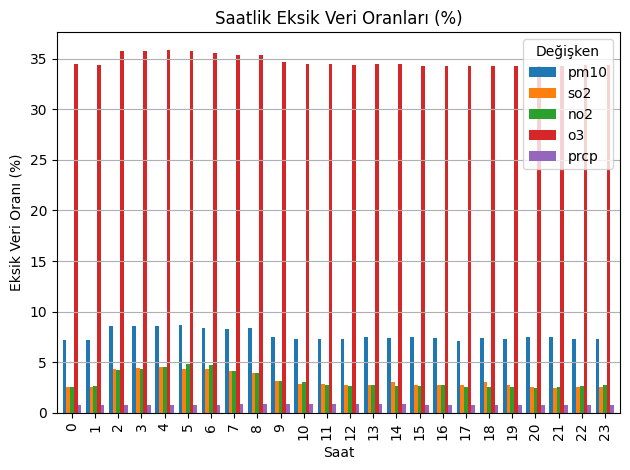

In [10]:
# Saatlik eksik veri oranlarını yeniden hesaplayalım
saatlik_eksik = df.groupby("hour")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
saatlik_eksik.plot(kind='bar', width=0.8)
plt.title("Saatlik Eksik Veri Oranları (%)")
plt.xlabel("Saat")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


🕒 Saatlik Eksik Veri Deseni  

Gece saatlerinde (00:00–05:00) pm10, so2, no2 gibi kirletici gazlarda eksik veri oranı belirgin şekilde artmaktadır.

🔹 Muhtemel neden: Otomatik ölçüm sistemlerinin devre dışı kalması veya bakım süreçleri.

o3 (ozon) değişkeni günün tüm saatlerinde %30 civarında eksik; bu da sistematik bir eksiklik olduğunu göstermektedir.

🔹 Muhtemel neden: Sensör arızası, veri kaybı ya da cihaz hassasiyet sorunları.

prcp (yağış) verisi tüm saatlerde istikrarlı ve güvenilir; eksiklik oranı düşüktür.

🟡 Bu desenler, eksik verilerin rastgele değil, belirli saat dilimlerinde yoğunlaştığını göstermekte; dolayısıyla zaman duyarlı tamamlama yöntemleri tercih edilmelidir.

📌 Genel Öneri:

pm10, so2, no2 için gece saatlerine özel eksik değer tamamlama yöntemleri (örneğin benzer günlerdeki aynı saatlerin ortalaması) uygulanabilir.

o3 için daha gelişmiş bir yöntem (ör. IterativeImputer + pozitif regresör) kaçınılmazdır.

**Günlük Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

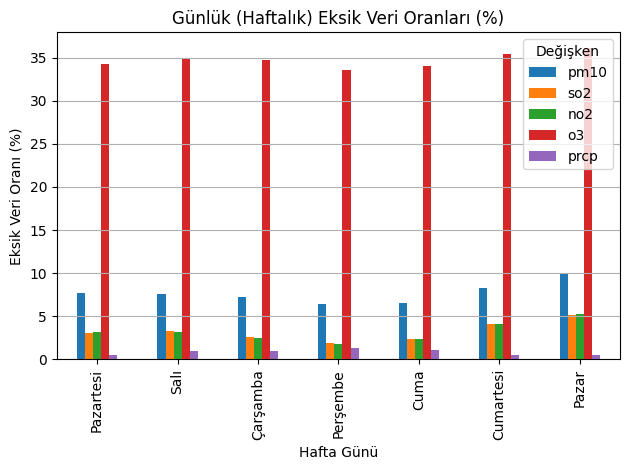

In [11]:
# Gün bilgisi ekleyelim
df["weekday"] = df["datetime"].dt.dayofweek  # Pazartesi = 0, Pazar = 6
hafta_gunleri = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df["hafta_gunu"] = df["weekday"].apply(lambda x: hafta_gunleri[x])

# Günlük (haftalık) eksik veri oranlarını hesaplayalım
gunluk_eksik = df.groupby("hafta_gunu")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Günleri haftalık sıraya göre sıralayalım
gunluk_eksik = gunluk_eksik.reindex(hafta_gunleri)

# Bar plot ile görselleştirelim
plt.figure(figsize=(12, 6))
gunluk_eksik.plot(kind='bar')
plt.title("Günlük (Haftalık) Eksik Veri Oranları (%)")
plt.xlabel("Hafta Günü")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


🟢 Genel Gözlemler:
pm10, so2, no2 değişkenlerinde hafta sonu (Cumartesi–Pazar) eksiklik oranı belirgin şekilde artmaktadır.

o3 değişkeni ise hafta boyunca yüksek ve sabit eksiklik oranı (~%30) göstermektedir.

prcp değişkeni yine tüm günlerde düşük eksik oranı ile dikkat çekmektedir.

📌 Özet:
Eksik veriler rastgele dağılmamakta, hafta sonlarında artış göstermektedir. Bu da veri eksikliği yönetiminde zaman-temelli stratejilerin (örn. hafta içi ve sonu ayrı ele alma) önemini ortaya koymaktadır.

**Aylık Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

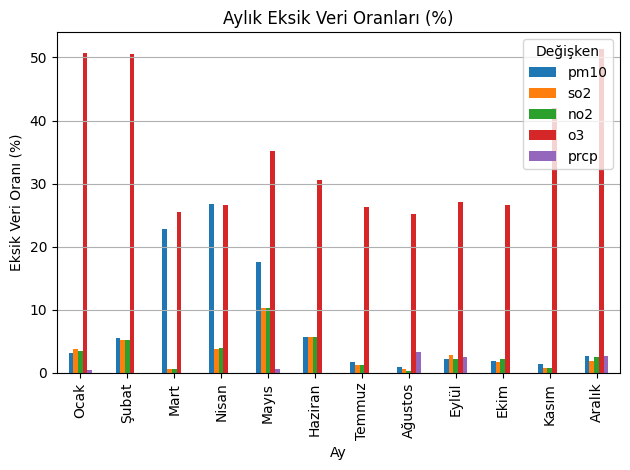

In [12]:
# Aylık eksik veri oranlarını yeniden hesaplayalım
aylik_eksik = df.groupby("month")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Ay isimleri listesi
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
aylik_eksik.index = ay_isimleri

# Bar plot çizimi
plt.figure(figsize=(12, 6))
aylik_eksik.plot(kind='bar')
plt.title("Aylık Eksik Veri Oranları (%)")
plt.xlabel("Ay")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()

📅 Aylık Eksik Veri Deseni

o3 (Ozon):
En yüksek eksiklik kış ve sonbahar aylarında (Ocak, Şubat, Kasım, Aralık) görülmektedir (%40’un üzerinde).

🔹 Olası neden: Soğuk hava, düşük güneş ışınımı veya sensör performans sorunları.

pm10, so2, no2:
Eksiklik oranı kış aylarında (Ocak, Şubat, Aralık) artış göstermektedir.

🔹 Olası neden: Cihaz donmaları, bakım eksiklikleri, çevresel koşullar.

prcp (Yağış):
Tüm aylarda eksiklik oranı düşüktür ve verisi güvenilirdir.


📌 Ana Mesaj:

Eksik veriler mevsimsel olarak değişkenlik göstermektedir. Kış aylarında eksiklikler belirginleşmektedir. Bu nedenle, veri tamamlama stratejileri mevsime duyarlı şekilde planlanmalıdır.

**Mevsimlik Eksik Veri Deseni**

<Figure size 1000x600 with 0 Axes>

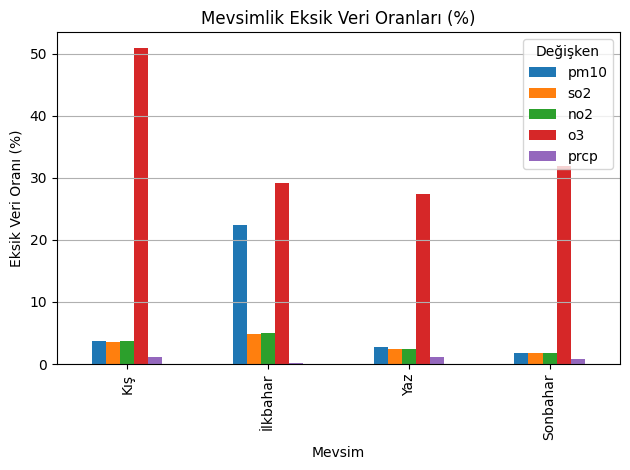

In [15]:
# Mevsim tanımlama fonksiyonunu tekrar oluşturalım
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# 'mevsim' sütununu yeniden oluştur
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# Mevsimlik eksik veri oranlarını hesapla
mevsim_eksik = df.groupby("mevsim")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Mevsimleri sıralayalım
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
mevsim_eksik = mevsim_eksik.reindex(mevsim_sirasi)

# Bar plot çizimi
plt.figure(figsize=(10, 6))
mevsim_eksik.plot(kind='bar')
plt.title("Mevsimlik Eksik Veri Oranları (%)")
plt.xlabel("Mevsim")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='upper right')
plt.tight_layout()
plt.show()


📌 Genel Değerlendirme:

Kış ve sonbahar aylarında eksik veri oranları tüm kirletici gazlar için yükselmektedir. Bu durum mevsimsel etkilerin sensör performansı üzerinde belirleyici olduğunu ve mevsime özel veri tamamlama yöntemlerinin zorunlu hale geldiğini açıkça göstermektedir.

🔁 IterativeImputer (Çoklu İtalyatif İmputasyon / MICE)

MICE (Multiple Imputation by Chained Equations), eksik verileri istatistiksel modelleme yoluyla dolduran bir yöntemdir. scikit-learn kütüphanesindeki IterativeImputer sınıfı bu yöntemin bir uygulamasıdır.

🧠 Nasıl Çalışır?

Her bir eksik sütun için regresyon modeli oluşturur.

Diğer sütunları bağımsız değişken (X), eksik sütunu bağımlı değişken (y) olarak kullanır.

Eksik değerleri tahmin eder ve yerine koyar.

Bu işlem tüm eksik sütunlar için sırasıyla tekrarlanır.

Birkaç iterasyon boyunca bu süreç döner ve değerler iyileştirilir.

✅ Avantajları

Mevsimsel veya çok değişkenli yapıları dikkate alır.

Tek boyutlu doldurmalardan (ortalama, medyan gibi) daha isabetlidir.

Özellikle eksiklik karmaşık desenler izliyorsa çok etkilidir.

❗ Dikkat Edilmesi Gerekenler

Tahmin modelleri (default: BayesianRidge) varsayımsal olabilir, modeller dikkatle seçilmeli.

Zaman serisi doğasında veri kaçağını (data leakage) önlemek için ileri-geri veri erişimi iyi yönetilmelidir.

Yüksek boyutlu veri için hesaplama maliyeti yüksektir.



In [34]:
# Gerekli kütüphaneler
!pip install xgboost  # Google Colab için
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor

# Kirletici ve meteorolojik değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
input_cols = kirleticiler + meteorolojik

# Veri çerçevesi (örnek olarak: df)
impute_df = df[input_cols].copy()

# XGBoost tabanlı imputasyon
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# Eksik verileri tahmin et
imputed_array = imputer.fit_transform(impute_df)

# DataFrame'e aktar ve negatif değerleri düzelt
imputed_df = pd.DataFrame(imputed_array, columns=input_cols)
for col in kirleticiler:
    imputed_df[col] = imputed_df[col].apply(lambda x: max(x, 0))

# Orijinal veri setine aktar
for col in kirleticiler:
    df[col] = imputed_df[col]


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [56]:
# 🔹 1. Gerekli kütüphaneler
!pip install xgboost
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 🔹 2. Meteorolojik sütunları belirle
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']  # 'wdir' hariç
df_meteo = df[meteorolojik].copy()

# 🔹 3. Imputer'ı tanımla
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# 🔹 4. Eksik verileri tahmin et
imputed_array = imputer.fit_transform(df_meteo)
df[meteorolojik] = pd.DataFrame(imputed_array, columns=meteorolojik)

# 🔹 5. Negatif değer kontrolü (örneğin sıcaklıklar için)
for col in meteorolojik:
    df[col] = df[col].apply(lambda x: max(x, 0))


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [58]:
import numpy as np

# wdir eksik değerleri işlemek için sin-cos dönüşümü kullanalım

# Radyan dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])

# sin ve cos bileşenlerini oluştur
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Eksik sin ve cos değerlerini zaman tabanlı interpolasyonla tamamlayalım
df = df.set_index('datetime')
df['wdir_sin'] = df['wdir_sin'].interpolate(method='time')
df['wdir_cos'] = df['wdir_cos'].interpolate(method='time')

# sin ve cos bileşenlerinden orijinal dereceye geri dönüş
df['wdir'] = (np.arctan2(df['wdir_sin'], df['wdir_cos']) * 180 / np.pi) % 360

# Geçici sütunları kaldıralım
df = df.drop(columns=['wdir_rad', 'wdir_sin', 'wdir_cos'])

# Eksik veri kalmış mı kontrol edelim
df['wdir'].isnull().sum()


np.int64(0)

In [60]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2021-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    35064 non-null  float64
 5   so2     35064 non-null  float64
 6   no2     35064 non-null  float64
 7   o3      35064 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  float64
 11  prcp    35064 non-null  float64
 12  wdir    35064 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    35064 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 4.3 MB


In [61]:
print(df_selected.describe().T)

        count         mean         std     min          25%          50%          75%      max
pm10  35064.0    43.492582   24.741113    0.31    26.870000    38.220000    54.152070   320.89
so2   35064.0     8.268668    7.361157    0.00     3.880000     6.280000    10.450000   209.86
no2   35064.0    31.843160   20.236906    0.38    17.200000    27.495000    41.871461   178.03
o3    35064.0    51.929368   27.980636    0.00    30.748943    50.370934    71.390000   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.200000    15.000000    22.000000    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.200000    11.000000    16.000000    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.000000    78.000000    89.000000   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.000000     0.000000     0.000000    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.000000    51.000000   200.000000   360.00
wspd  35064.0    16.274809   11.481866    0.00    

Fonksyonlar
 isnull(), fillna() fonksiyonlar1 eksik
verileri tespit etme ve doldurma için
kullan1l1r

Yapay zeka önerileri ile eksik veri
stratejileri geli_tirilir. Daha do ru ve
güvenilir veri setleri olu_turulur.

 Eksik veri analizi, veri kalitesini
art1rmak için kritik öneme sahiptir.
Do ru analizler için temel olu_turur.


## Aykırı Değerler (Outliers)

In [68]:
# Aykırı değer tespiti için IQR yöntemini kullanalım
def iqr_outlier_analysis(df, columns):
    outlier_summary = {}

    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Aykırı değer sayısı
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_count = outliers.count()
        total_count = df[col].count()
        ratio = 100 * outlier_count / total_count

        outlier_summary[col] = {
            "Aykırı Değer Sayısı": outlier_count,
            "Toplam Gözlem": total_count,
            "Oran (%)": round(ratio, 2)
        }

    return pd.DataFrame(outlier_summary).T.sort_values("Oran (%)", ascending=False)

# Kirletici ve meteorolojik tüm değişkenleri analiz et
degiskenler = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
aykiri_df = iqr_outlier_analysis(df, degiskenler)

# import ace_tools as tools; tools.display_dataframe_to_user(name="Aykırı Değer Özeti (IQR Yöntemi)", dataframe=aykiri_df)
# Replace the above line with a standard display method
print("Aykırı Değer Özeti (IQR Yöntemi):")
display(aykiri_df)

Aykırı Değer Özeti (IQR Yöntemi):


,Aykırı Değer Sayısı,Toplam Gözlem,Oran (%)
prcp,4197.0,35064.0,11.97
so2,1871.0,35064.0,5.34
pm10,1419.0,35064.0,4.05
no2,1090.0,35064.0,3.11
pres,428.0,35064.0,1.22
o3,211.0,35064.0,0.60
wspd,82.0,35064.0,0.23
rhum,72.0,35064.0,0.21
temp,3.0,35064.0,0.01
dwpt,0.0,35064.0,0.00


In [71]:
from scipy.stats import zscore
import pandas as pd
from IPython.display import display # Import display

# Sayısal değişkenler üzerinde Z-score hesaplayalım
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
z_scores = df[numeric_cols].apply(zscore)

# Aykırı değerler: Z-score mutlak değeri > 3
z_outlier_counts = (z_scores.abs() > 3).sum()
total_counts = df[numeric_cols].count()
z_outlier_ratios = (z_outlier_counts / total_counts * 100).round(2)

# Özet tablo
z_outlier_summary = pd.DataFrame({
    'Aykırı Değer Sayısı (Z > 3)': z_outlier_counts,
    'Toplam Gözlem': total_counts,
    'Aykırı Oranı (%)': z_outlier_ratios
}).sort_values(by='Aykırı Oranı (%)', ascending=False)

# Use the standard display function instead of ace_tools
print("Z-Score Aykırı Değer Özeti:")
display(z_outlier_summary)

Z-Score Aykırı Değer Özeti:


,Aykırı Değer Sayısı (Z > 3),Toplam Gözlem,Aykırı Oranı (%)
prcp,532,35064,1.52
so2,522,35064,1.49
pm10,519,35064,1.48
no2,451,35064,1.29
o3,172,35064,0.49
wspd,116,35064,0.33
pres,116,35064,0.33
rhum,62,35064,0.18
temp,5,35064,0.01
dwpt,0,35064,0.00


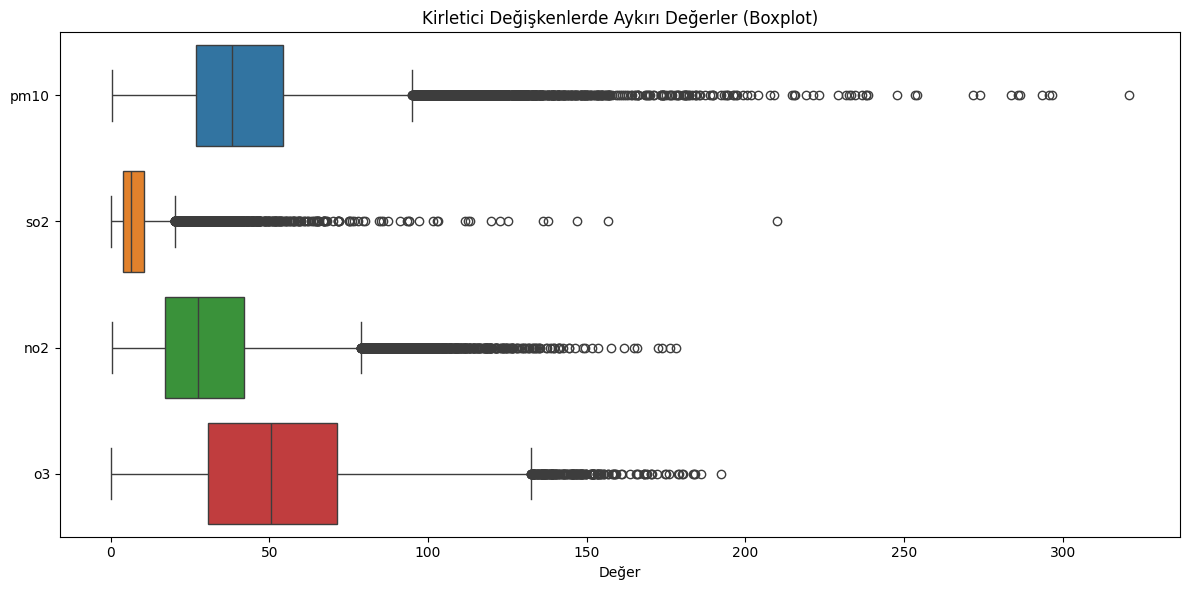

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kirletici değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']

# Grafik ayarları
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kirleticiler], orient='h')
plt.title("Kirletici Değişkenlerde Aykırı Değerler (Boxplot)")
plt.xlabel("Değer")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.ensemble import IsolationForest

# Sayısal değişkenleri seçelim
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']

# Eksiksiz gözlemleri alalım
df_clean = df[numeric_cols].dropna()

# Isolation Forest modeli tanımlayalım
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_clean['outlier'] = iso_forest.fit_predict(df_clean)

# -1 olanlar aykırı kabul edilir
outlier_count = (df_clean['outlier'] == -1).sum()
total = df_clean.shape[0]
outlier_ratio = round(100 * outlier_count / total, 2)

outlier_count, total, outlier_ratio


(np.int64(351), 35064, np.float64(1.0))

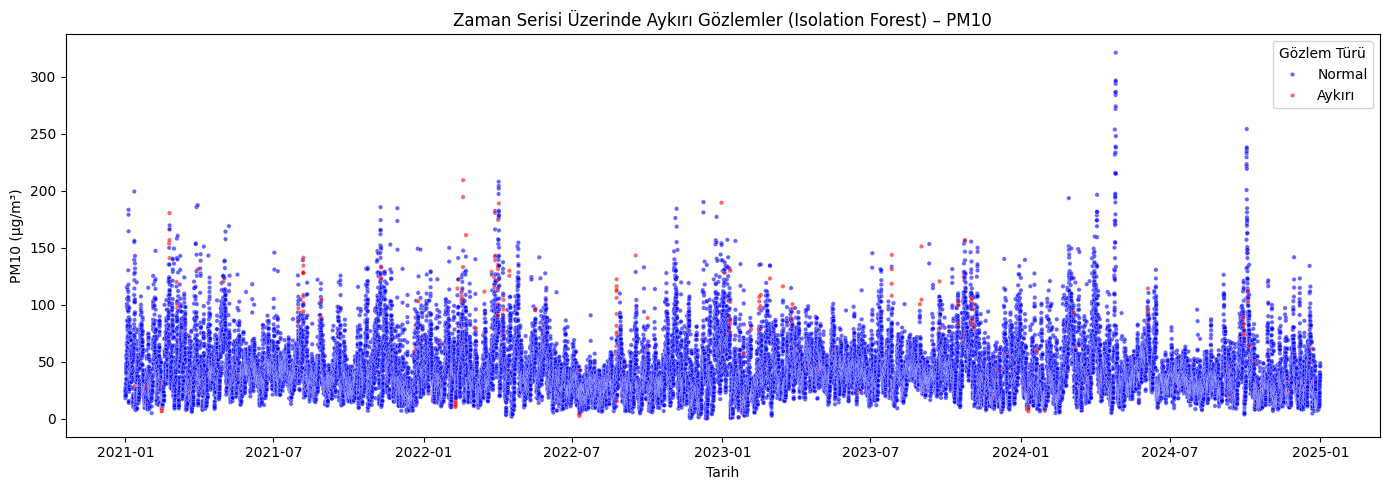

In [73]:
# datetime sütunu indeks durumunda olduğu için yeniden sütuna çevirelim
df_reset = df.reset_index()

# Zaman bilgisi ve sayısal değişkenler ile yeni bir DataFrame oluşturalım
df_vis = df_reset[numeric_cols + ['datetime']].dropna().copy()

# Isolation Forest modelini tekrar uygulayalım
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_vis['outlier'] = iso_forest.fit_predict(df_vis[numeric_cols])

# Aykırı gözlemleri etiketleyelim
df_vis['outlier_label'] = df_vis['outlier'].map({1: 'Normal', -1: 'Aykırı'})

# Zaman serisi üzerinde aykırı ve normal gözlemleri görselleştirelim
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_vis, x='datetime', y='pm10', hue='outlier_label',
                palette={'Normal': 'blue', 'Aykırı': 'red'}, alpha=0.6, s=10)
plt.title("Zaman Serisi Üzerinde Aykırı Gözlemler (Isolation Forest) – PM10")
plt.xlabel("Tarih")
plt.ylabel("PM10 (µg/m³)")
plt.legend(title="Gözlem Türü")
plt.tight_layout()
plt.show()


Tespt Yöntemler
 Kutu grafikleri (box plots)
ve IQR (Çeyrekler Aras1
Aral1k) yöntemi (1.5×IQR
kural1) aykırı değerleri
belirlemek için kullan1l1r.
Makine öğrenmesi
algoritmalar1 (Isolation
Forest, LOF, DBSCAN gibi)
karmaşık veri setlerindeki
aykırı değerleri tespit etmede
geleneksel yöntemlerden
daha başarılıdır

Görselleştirme
Teknikler
 Scatter plot, box plot ve
histogram gibi
görselleştirme teknikleri,
aykırı değerlerin görsel olarak
tespit edilmesine yardımcı
olur

 Bu görselleştirmeler veri
eğilimlerini ve sapmalar1n1
h1zl1ca tanımlamayı sağlar.

Ele Alma Stratej ler
 Ayk1r1 de erler tespit
edildikten sonra silme,
dönü_türme, impütasyon
veya ayr1 bir model ile ele
alma gibi farkl1 stratejiler
uygulanabilir.

## Veri Görselleştirme

Histogram (plot.hist())
 Verideki dagılımın şeklini, modunu
ve aralıkların gösterir. Bu grafikler
simetri, çarpıklık ve çok modluluk
gibi özellikleri görünür kılar ve
sürekli değişkenlerin analizinde
temel araçtır.

Yoğunluk Grafikleri
 Kernel yo unluk tahmini (KDE)
kullanarak daha yumuşak dağılımm
gösterimleri sunar. Özellikle küçük
örneklemlerde histogramlara göre
daha az gürültülü ve çoklu
dağılımlar karşılaştırmada etkilidir

AI Otomasyonu
 Görselle_tirme süreçleri optimize
edilebilir. AI algoritmalar1 en uygun
grafik türünü önerebilir, renk
Şemalar1n1 iyileştirebilir ve otomatik
yorumlar üretebilir. Ayr1ca büyük
veri setlerindeki anomalileri tespit
etmede de kullan1labilir

## Korelasyon Analizi

Korelasyon Hesaplama
 corr() fonksiyonu ile de i_kenler
aras1ndaki ili_kiler analiz edilir.
Pearson, Spearman ve Kendall gibi
farkl1 korelasyon yöntemleri, veri
tipine ve da 1l1m1na göre
seçilmelidir.

Is1 Hartalar1 le
Görselle_trme
 Is1 haritalar1, çok boyutlu veri
setlerindeki ili_kileri görsel olarak
anlamak için etkili araçlard1r.
Özellikle sns.heatmap() fonksiyonu,
korelasyon matrislerini renk
kodlar1yla göstererek, güçlü ili_kileri
h1zl1ca tespit etmeyi sa lar

Doğru Yorumlama
 Korelasyon analizi, modelleme
için önemli ipuçları verse de
"korelasyon nedensellik
değildir" prensibi
hat1rlanmal1d1r. Güçlü
korelasyonlar, hipotez
olu_turma ve daha detayl1
analizler için yol gösterici olarak
kullan1lmal1d1r.

## Kategorik Veri Analizi

 Kategorik veriler, s1n1rl1 say1da olas1 de er alan ve genellikle nominal veya ordinal ölçeklerde ifade edilen veri
türleridir. Bu tür verilerin analizi, örüntüleri ke_fetmek ve da 1l1m özelliklerini anlamak için kritik öneme sahiptir.

## Çok Değişkenli Analiz

 scatter_matrix() ve pairplot() kullan1larak çok de i_kenli analiz yap1l1r. AI ile de i_kenler aras1 ili_kilerin
yorumlanmas1 sa lan1r. Çok de i_kenli analiz, verideki karma_1k ili_kileri ortaya ç1kar1r.


## Otomatik EDA Raporlama

Pandas-profiling kullan1kullanılarak otomatik EDA raporlar1 oluşturulur.
Verinin genel durumu hakk1nda h1zl1ca bilgi edinilir

# Feature Engineering

Feature engineering için
AI önerileri alınır. Modelin
performansını arttırmak
için yeni özellikler
oluşturulur

# Model Seçimi

 Model seçimi ve
hiperparametre
optimizasyonu
tavsiyeleri al1n1r. En
uygun model belirlenir.


HAVA KALİTESİ İNDEKSİ

Hava Kalitesi indeksi (HKİ), hava kalitesinin günlük olarak rapor edilmesi için kullanılan bir indekstir. Yaşadığımız bölgenin havasının ne kadar temiz veya kirli olduğu ve ne tür sağlık etkilerinin oluşabileceği konusunda bilgiler verir.

Hava kalitesi indeksi, farklı hava kalitesi seviyeleri ile birlikte bunların genel halk sağlığı üzerindeki etkisini ve sağlıksız seviyeye yükseldiğinde alınması gereken kademeleri de belirler. Ulusal Hava Kalitesi İndeksi, EPA Hava Kalitesi İndeksini ulusal mevzuatımız ve sınır değerlerimize uyarlayarak oluşturulmuştur. 5 temel kirletici için hava kalitesi indeksi hesaplanmaktadır.

Bunlar; partikül maddeler (PM10), karbonmonoksit (CO), kükürtdioksit (SO2), azotdioksit (NO2) ve ozon (O3) dur. Hava kalitesi indeksi 6 kategoriden oluşmaktadır. Matematiksel hesaplama yoktur, yalnızca sınıflandırmadır. En yüksek kirletici için belirlenen değer indeks değeridir.

kaynak:
https://dathm.csb.gov.tr/hava-kalitesi-indeksi-i-89066

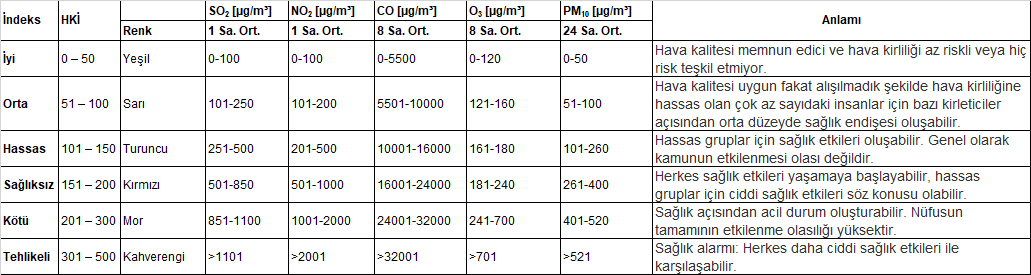